# The travel salesman problem

Seja $G = (V,A)$ um grafo conectado, onde $V$ é o conjunto de vértices que representam o conjunto de cidades que se devem visitar. O vértice 0 representa a origem. O conjunto $A$ é o conjunto de arcos que ligam as cidades, $A = \{(i,j) \in V \times V \ : \ i \not=j \}$.

- Variáveis

Seja $x_{ij}$ a variável binária que é igual a 1 quando se viaja diretamente da cidade $i$ para a cidade $j$ para $(i,j) in A$, e 0 caso contrário.

$
x_{ij} =
\left\{
\begin{array}{lr}
1, \mbox{ se visita o arco } (i,j) \in A \\
0, \mbox{ caso contrário}
\end{array}
\right.
$

Seja $d_{ij}$ a distância da cidade $i$ para a cidade $j$.

$u_i$ = variável contínua, de onde se visita o vértice $i \in V$.

- Modelo

$
\begin{align*}
\min \ & \sum_{(i,j) \in A} x_{ij} d_{ij} \\
& \sum_{i \in I} x_{ij} = 1 \ \forall \ j \in V \\
& \sum_{j \in J} x_{ij} = 1 \ \forall \ i \in I \\
\end{align*}
$

- Formulação MTZ

$
u_1 + 1 - u_j + (n-1)(1 - x_{ij}) \leq n-2 \ \forall \ i,j \in V 
$

- Formulação MTZ com restrição de indicador

Se $x_{ijk} = 1$ entãp $u_i +1 = u_j$ para todo $i,j \in V$

In [16]:
# import bibliotecas
from gurobipy import GRB, quicksum, Model
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# criando os vértices
n = 21
vertices = [i for i in range(n)]
vertices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [18]:
# criando os arcos
arcos = [(i,j) for i in vertices for j in vertices if i!=j]
arcos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),


In [19]:
# coordenadas
np.random.seed(0)
X = np.random.random(n) * 100
Y = np.random.random(n) * 100

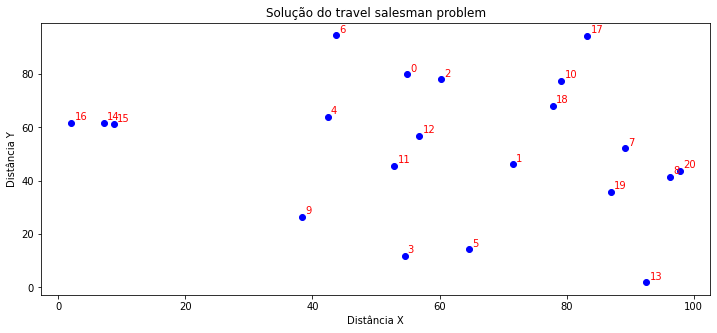

In [20]:
# distancias
distancia = {
    (i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in vertices if i!=j
}

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n]), xytext = (X[n]+0.5, Y[n]+1), color='red')

plt.xlabel("Distância X")
plt.ylabel("Distância Y")
plt.title("Solução do travel salesman problem")
plt.show()

In [21]:
# modelo 

# criando modelo
model = Model("TSP")

# variáveis
x = model.addVars(arcos, vtype = GRB.BINARY, name = 'x')
u = model.addVars(vertices, vtype = GRB.CONTINUOUS, name = 'u')

# função objetivo
model.setObjective(quicksum(distancia[n] * x[n] for n in arcos), GRB.MINIMIZE)

# restrições
model.addConstrs(quicksum(x[i,j] for j in vertices if j!=i) == 1 for i in vertices)
model.addConstrs(quicksum(x[i,j] for i in vertices if i!=j) == 1 for j in vertices)
model.addConstrs((x[i,j] == 1) >> (u[i]+1 == u[j]) for i,j in arcos if j!=0)

# parametros
model.Params.timeLimit = 60
model.Params.MIPGap = 0.1

# resolve problema
model.optimize()


Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-20
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.1
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 42 rows, 441 columns and 840 nonzeros
Model fingerprint: 0xf0833cb6
Model has 400 general constraints
Variable types: 21 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 400 rows and 400 columns
Presolve time: 0.01s
Presolved: 442 rows, 841 columns, 1850 nonzeros
Presolved model has 400 SOS constraint(s)
Variable types: 421 continuous, 420 integer (420 binary)

Root relaxation: objective 3.267793e+02, 67 iterations, 0.00 seconds (0.00 work units)

 

In [22]:
# imprimindo as soluções
print("valor ótimo:", str(round(model.objVal,2)))

for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

valor ótimo: 389.28
x[0,6]=1.0
x[1,18]=1.0
x[2,0]=1.0
x[3,5]=1.0
x[4,12]=1.0
x[5,13]=1.0
x[6,16]=1.0
x[7,1]=1.0
x[8,20]=1.0
x[9,3]=1.0
x[10,17]=1.0
x[11,9]=1.0
x[12,11]=1.0
x[13,19]=1.0
x[14,15]=1.0
x[15,4]=1.0
x[16,14]=1.0
x[17,2]=1.0
x[18,10]=1.0
x[19,8]=1.0
x[20,7]=1.0
u[1]=16.0
u[2]=20.0
u[3]=9.0
u[4]=5.0
u[5]=10.0
u[6]=1.0
u[7]=15.0
u[8]=13.0
u[9]=8.0
u[10]=18.0
u[11]=7.0
u[12]=6.0
u[13]=11.0
u[14]=3.0
u[15]=4.0
u[16]=2.0
u[17]=19.0
u[18]=17.0
u[19]=12.0
u[20]=14.0


[(0, 6), (1, 18), (2, 0), (3, 5), (4, 12), (5, 13), (6, 16), (7, 1), (8, 20), (9, 3), (10, 17), (11, 9), (12, 11), (13, 19), (14, 15), (15, 4), (16, 14), (17, 2), (18, 10), (19, 8), (20, 7)]


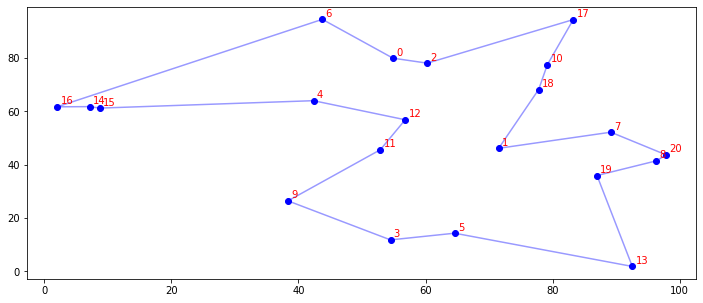

In [23]:
# solução gráfica

# arcos ativos

arcos_ativos = [i for i in arcos if x[i].x > 0.9]
print(arcos_ativos)

# imprimindo a solução ótima
plt.figure(figsize = (12,5))
plt.xlabel
plt.ylabel

# graficando os pontos
plt.scatter(x=X, y=Y, color='blue', zorder=1)

# linhas entre os arcos ativos
for i,j in arcos_ativos:
    plt.plot([X[i],X[j]],[Y[i],Y[j]], color='b', alpha=0.4, zorder=0)

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n]), xytext=(X[n]+0.5, Y[n]+1), color='red')

plt.show()